In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df1 = pd.read_csv("./hw2_data/hw2_data/data_train_hw2_problem1.csv")
df1.describe()


,y,x1,x2,x3
count,30.000000,30.000000,30.000000,30.000000
mean,34.245267,0.633333,0.333333,0.366667
std,47.322430,5.834637,1.715715,0.490133
min,-14.400000,-9.300000,-2.800000,0.000000
25%,-3.805500,-4.325000,-0.775000,0.000000
50%,9.725000,2.200000,0.250000,0.000000
75%,70.150000,4.975000,1.950000,1.000000
max,137.000000,9.700000,3.000000,1.000000


Problem 1: 60 pts
1. Refs: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py 

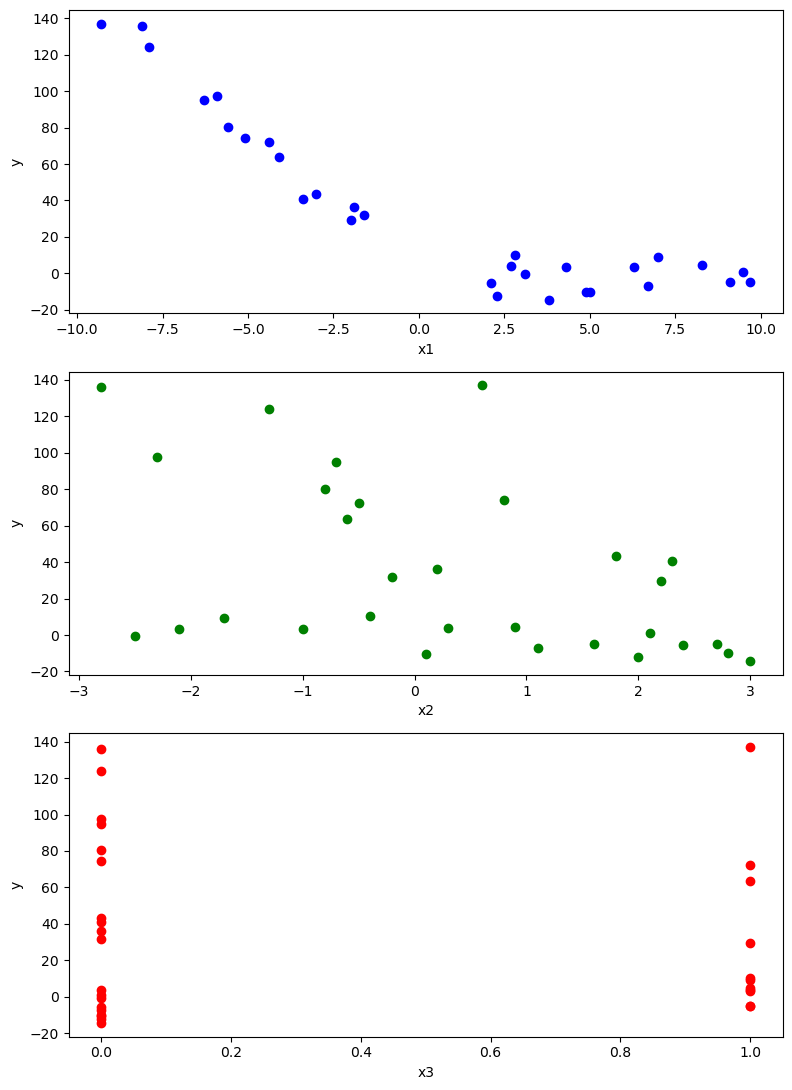

In [3]:
df1 = pd.read_csv("./hw2_data/hw2_data/data_train_hw2_problem1.csv")
df1.describe()
fig, axes = plt.subplots(3, 1, figsize=(8, 11))

axes[0].scatter(df1['x1'], df1['y'], color='b')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('y')

axes[1].scatter(df1['x2'], df1['y'], color='g')
axes[1].set_xlabel('x2')
axes[1].set_ylabel('y')

axes[2].scatter(df1['x3'], df1['y'], color='r')
axes[2].set_xlabel('x3')
axes[2].set_ylabel('y')

plt.tight_layout()
plt.show()

a. The problem 1 training data appears to have 1 quantitative outcome variable dependent on 3 input variables (x1, x2, and x3), two of which are quantitative (x1 and x2). There are 30 entries for each variable. X3 appears to take the value of either 1 or 0, and both x1 and x2 have standard deviations greater than their means. Quickly plotting y against each x individually suggests that x3 is likely an encoded categorical variable, or an indicator variable. There appears to be tight correlation between y and x1, and very little between y and x2.

In [28]:
# b. fit model and get values for beta and variance 

## beta 
output = df1['y']
input = df1[['x1', 'x2', 'x3']]
model1 = LinearRegression()
model1.fit(input, output)
beta = model1.coef_
print(beta)

## variance 
# the maximum likelihood estimator for the variance is (1/N) * RSS 
y_pred = model1.predict(input)
N = len(y_pred)
p = len(beta)
sum_squared_res = sum((output - y_pred)**2)
mle_var = (1/ (N)) * sum_squared_res
mle_var_unbias = (1/ (N - p)) * sum_squared_res
print(mle_var)

[-6.97783835 -4.48136866  9.1174332 ]
345.7908856938027


In [5]:
# c. use MSE as performance metric
from sklearn.metrics import mean_squared_error
y_pred = model1.predict(input)
mean_squared_error(output, y_pred)

345.7908856938028

In [21]:
# d. check with the held out testing data - the model performs worse
df2 = pd.read_csv("./hw2_data/hw2_data/data_test_hw2_problem1.csv")
output2 = df2['y']
input2 = df2[['x1', 'x2', 'x3']]
y_pred2 = model1.predict(input2)
mean_squared_error(output2, y_pred2)

737.0405264319648

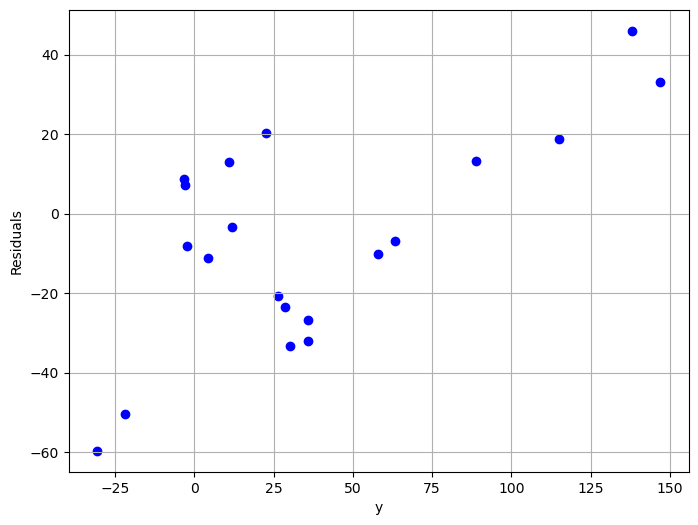

In [30]:
# e. plot residuals as a function of y
e = output2 - y_pred2
y = output2 
plt.figure(figsize=(8, 6))
plt.scatter(y, e, color='blue')
plt.xlabel('y')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

*Part e Explanation:*
